In [181]:
%matplotlib inline
import time
import numpy as np
import pandas as pd
import imageio as io
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

from os import listdir, makedirs, getcwd, remove
from os.path import isfile, join, abspath, exists, isdir, expanduser


In [182]:
!ls MURA-v1.0/

test  test_submission_example.csv  train  train.csv  valid  valid.csv


In [218]:
data_dir = join(getcwd(),'MURA-v1.0')
train_dir = join(data_dir, 'train')
train_csv = join(data_dir,'train.csv')
val_dir = join(data_dir, 'valid')
val_csv = join(data_dir,'valid.csv')
test_dir = join(data_dir, 'test')
# some sanity checks on our directory structure . . .
assert isdir(data_dir) and isdir(train_dir) and isdir(val_dir) and isdir(test_dir)
assert exists(train_csv) and isfile(train_csv) and exists(val_csv) and isfile(val_csv)

## Loading the dataset directly

(512, 290)
(512, 407, 3)
(512, 209)
(512, 406, 3)
(512, 294)


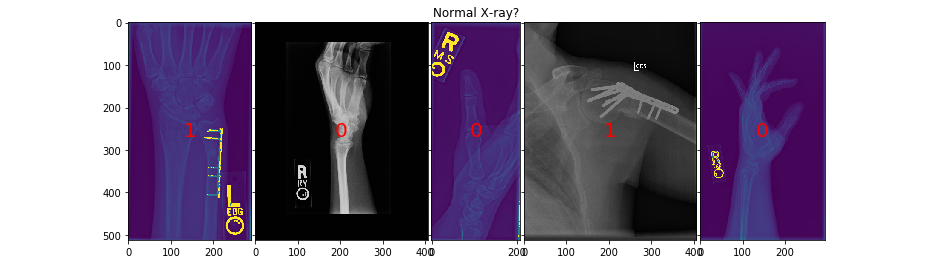

<bound method NDFrame.describe of                                                 filename  abnormal
0      MURA-v1.0/train/XR_SHOULDER/patient00001/study...         1
1      MURA-v1.0/train/XR_SHOULDER/patient00001/study...         1
2      MURA-v1.0/train/XR_SHOULDER/patient00001/study...         1
3      MURA-v1.0/train/XR_SHOULDER/patient00002/study...         1
4      MURA-v1.0/train/XR_SHOULDER/patient00002/study...         1
5      MURA-v1.0/train/XR_SHOULDER/patient00002/study...         1
6      MURA-v1.0/train/XR_SHOULDER/patient00003/study...         1
7      MURA-v1.0/train/XR_SHOULDER/patient00003/study...         1
8      MURA-v1.0/train/XR_SHOULDER/patient00003/study...         1
9      MURA-v1.0/train/XR_SHOULDER/patient00004/study...         1
10     MURA-v1.0/train/XR_SHOULDER/patient00004/study...         1
11     MURA-v1.0/train/XR_SHOULDER/patient00004/study...         1
12     MURA-v1.0/train/XR_SHOULDER/patient00004/study...         1
13     MURA-v1.0/train/XR_SH

In [404]:
train_df = pd.read_csv(train_csv, names=['filename','abnormal'])
fig = plt.figure(1, figsize=(16, 4))
plt.title('Normal X-ray?')
plt.axis('off')
grid = ImageGrid(fig, 111, nrows_ncols=(1, 5), axes_pad=0.05)  
left, width = .25, .5
bottom, height = .25, .5
right = left + width
top = bottom + height
img_idx=0
for (i, row) in train_df.sample(5).iterrows():
    ax = grid[img_idx]
    ax.text(0.5*(left+right), 0.5*(bottom+top), 
            row.abnormal,ha='center',va='center',
            fontsize=20, color='red',transform=ax.transAxes)
    ax.grid(False)
    img = imageio.imread(row.filename)
    print(img.shape)
    ax.imshow(img)
    img_idx+=1

plt.show()
print(train_df.describe)

## Loading the dataset in pytorch

37110


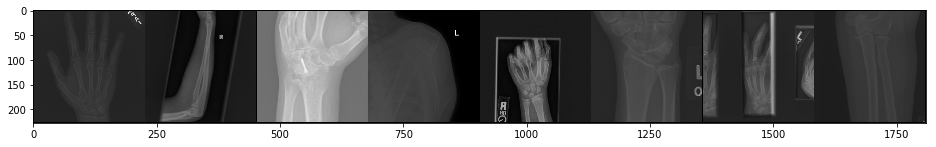

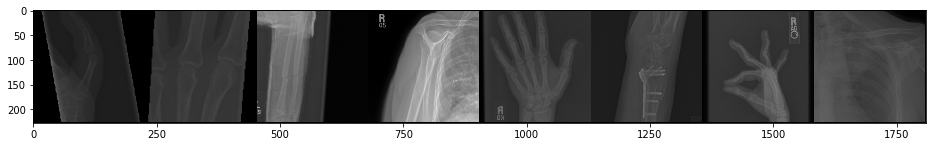

In [411]:
import torch.utils.data as data
from skimage import io, transform

class MuraDataset(data.Dataset):

    def __init__(self, csv_file, root_dir, transform=None, loader=default_loader):
        self.mura_dataset_df = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform


    def __len__(self):
        return len(self.mura_dataset_df)

    def __getitem__(self, idx):
        img_name = join( self.mura_dataset_df.iloc[idx, 0])
        image = Image.open(img_name).convert('RGB')
        label = self.mura_dataset_df.iloc[idx, 1:].as_matrix()[0]
        if self.transform is not None:
            image = self.transform(image)
        
        return image,label

import torch
import torchvision
from torchvision.utils import make_grid
from torchvision import transforms, utils
import torchvision.transforms as transforms


def imshow(img):
    plt.figure(1, figsize=(16, 4))
    plt.imshow(np.transpose(img.numpy(), (1, 2, 0)))
    plt.pause(0.001)


# get some random training images
trs = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
])

trainset = MuraDataset(csv_file=train_csv, root_dir=data_dir, transform = trs)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=8, shuffle=True, num_workers=8)

print(len(trainset))
dataiter = iter(trainloader)

images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))

images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))

